val bovw

In [1]:
import cv2
import numpy as np
import os
import pylab as pl
from sklearn.metrics import confusion_matrix, accuracy_score 
import joblib

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the classifier, class names, scaler, number of clusters and vocabulary 
#from stored pickle file (generated during training)
clf, classes_names, stdSlr, k, voc = joblib.load('/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Models/bovw_color_brisk.pkl'  )

# Get the path of the testing image(s) and store them in a list
test_path = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color'  

testing_names = os.listdir(test_path)

In [3]:
# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
image_classes = []
class_id = 0

#To make it easy to list all file names in a directory let us define a function
#
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]


In [4]:
for testing_name in testing_names:
    if not testing_name.endswith('.csv'):
        dir = os.path.join(test_path, testing_name)
        class_path = imglist(dir)
        image_paths+=class_path
        image_classes+=[class_id]*len(class_path)
        class_id+=1
        
# Create feature extraction and keypoint detector objects
    #SIFT is not available anymore in openCV    
# Create List where all the descriptors will be stored

In [5]:
print(len(image_classes))

1999


In [6]:
des_list = []

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
brisk = cv2.BRISK_create(30)


In [8]:
import cv2

# Iterate through image paths
for image_path in image_paths:
    # Read the image
    im = cv2.imread(image_path)
    
    # Check if the image is not empty
    if im is not None and im.size > 0:
        im = cv2.imread(image_path)
        kpts, des = brisk.detectAndCompute(im, None)
        des_list.append((image_path, des))
    else:
        print(f"Skipping {image_path} because it is empty or could not be loaded.")


Skipping /media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color/Cat/11210.jpg because it is empty or could not be loaded.
Skipping /media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color/Cat/11565.jpg because it is empty or could not be loaded.
Skipping /media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color/Cat/11874.jpg because it is empty or could not be loaded.
Skipping /media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color/Cat/11935.jpg because it is empty or could not be loaded.
Skipping /media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color/Dog/11410.jpg because it is empty or could not be loaded.
Skipping /media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color/Dog/11675.jpg because it is empty or could not be loaded.
Skipping /media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color/Dog/11849.jpg because it is empty or could not be loaded.
Skippi

In [12]:
# Filter out empty and None descriptors from descriptor_list
valid_descriptors = [descriptor for _ , descriptor in des_list if descriptor is not None and descriptor.ndim > 0]

# Stack all the valid descriptors vertically in a numpy array
if valid_descriptors:
    descriptors = np.concatenate(valid_descriptors, axis=0)
    print("Descriptors stacked successfully!")
else:
    print("No valid descriptors found.")


Descriptors stacked successfully!


In [13]:
type(des_list[1254])

tuple

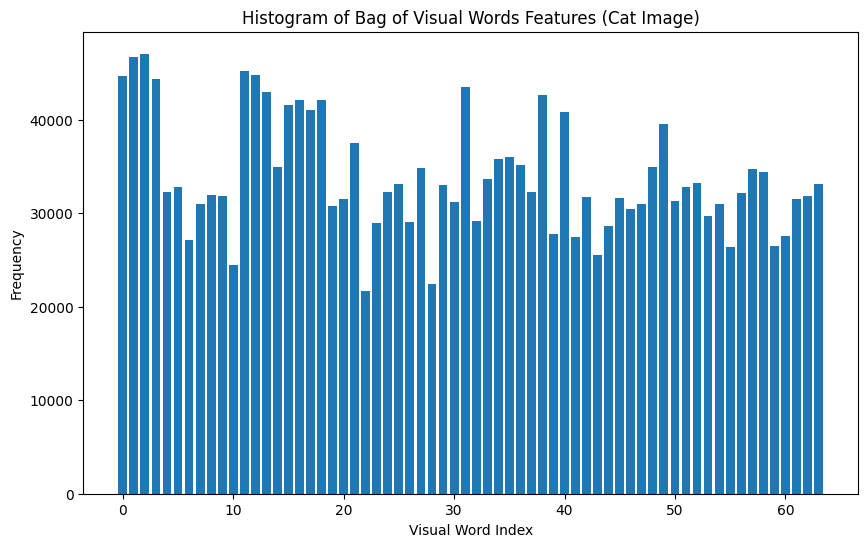

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out any empty descriptors
descriptors_filtered = [descriptor for descriptor in des_list[0][1] if len(descriptor) > 0]

# Assuming all descriptors have the same length or shape
# Convert the descriptors list into a numpy array
features_array = np.array(descriptors_filtered)

# Calculate the histogram of features
histogram = np.sum(features_array, axis=0)

# Display the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(histogram)), histogram)
plt.xlabel('Visual Word Index')
plt.ylabel('Frequency')
plt.title('Histogram of Bag of Visual Words Features (Cat Image)')
plt.show()


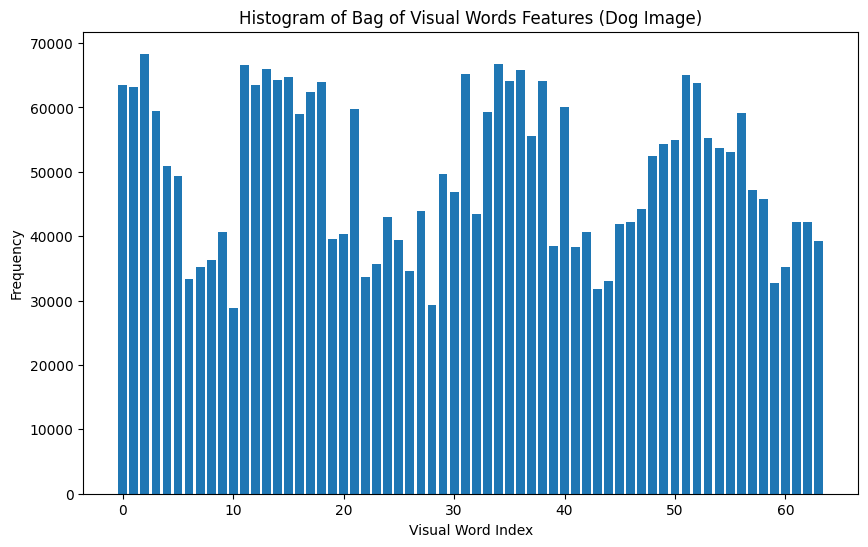

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out any empty descriptors
descriptors_filtered = [descriptor for descriptor in des_list[1597][1] if len(descriptor) > 0]

# Assuming all descriptors have the same length or shape
# Convert the descriptors list into a numpy array
features_array = np.array(descriptors_filtered)

# Calculate the histogram of features
histogram = np.sum(features_array, axis=0)

# Display the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(histogram)), histogram)
plt.xlabel('Visual Word Index')
plt.ylabel('Frequency')
plt.title('Histogram of Bag of Visual Words Features (Dog Image)')
plt.show()


In [34]:
from scipy.cluster.vq import vq

test_features = np.zeros((len(image_paths), k), "float32")

# Iterate through descriptor list
for i in range(len(des_list)):
    if i >= len(test_features):
        print(f"Skipping descriptor {i} because index is out of bounds.")
        continue
    
    descriptors = des_list[i][1]
    
    # Skip None types
    if descriptors is None:
        print(f"Skipping descriptor {i} because it is None.")
        continue
    
    # Convert descriptors to NumPy array
    descriptors_array = np.array(descriptors)
    
    # Check for NaN or infinite values
    if not np.isnan(descriptors_array).any() and not np.isinf(descriptors_array).any():
        # Perform vector quantization
        words, distance = vq(descriptors_array, voc)
        
        # Update test_features only if indices are within bounds
        for w in words:
            if 0 <= w < k:  # Check if w is within the bounds of test_features
                test_features[i][w] += 1
            else:
                print(f"Skipping index {w} because it is out of bounds.")
    else:
        print(f"Skipping descriptor {i} because it contains NaN or infinite values.")


Skipping descriptor 1468 because it is None.
Skipping descriptor 1999 because index is out of bounds.
Skipping descriptor 2000 because index is out of bounds.
Skipping descriptor 2001 because index is out of bounds.
Skipping descriptor 2002 because index is out of bounds.
Skipping descriptor 2003 because index is out of bounds.
Skipping descriptor 2004 because index is out of bounds.
Skipping descriptor 2005 because index is out of bounds.
Skipping descriptor 2006 because index is out of bounds.
Skipping descriptor 2007 because index is out of bounds.
Skipping descriptor 2008 because index is out of bounds.
Skipping descriptor 2009 because index is out of bounds.
Skipping descriptor 2010 because index is out of bounds.
Skipping descriptor 2011 because index is out of bounds.
Skipping descriptor 2012 because index is out of bounds.
Skipping descriptor 2013 because index is out of bounds.
Skipping descriptor 2014 because index is out of bounds.
Skipping descriptor 2015 because index is o

In [33]:
len(des_list)

2209

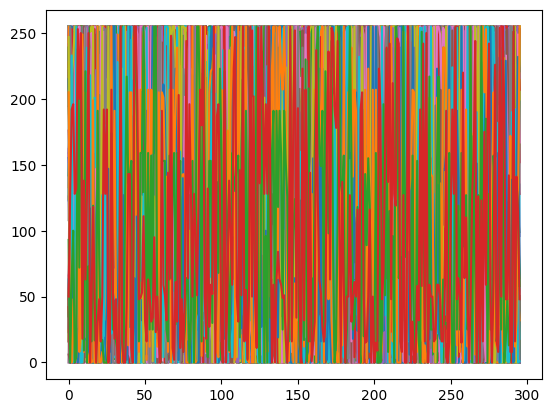

In [35]:
plt.plot(range(len(descriptors)), descriptors)
plt.show()

In [36]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [37]:
# Scale the features
#Standardize features by removing the mean and scaling to unit variance
#Scaler (stdSlr comes from the pickled file we imported)
test_features = stdSlr.transform(test_features)


In [38]:
# Check lengths of both lists
print(len(classes_names))
print(len(image_classes))

image_classes[100]

2
1999


0

In [39]:
print(classes_names)

['Cat', 'Dog']


In [40]:
#Report true class names so they can be compared with predicted classes
true_class =  [classes_names[i] for i in image_classes]
# Perform the predictions and report predicted class names. 
predictions =  [classes_names[i] for i in clf.predict(test_features)]


#Print the true class and Predictions 
print ("true_class ="  + str(true_class))
print ("prediction ="  + str(predictions))


true_class =['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 

accuracy =  0.6308154077038519
[[760 240]
 [498 501]]


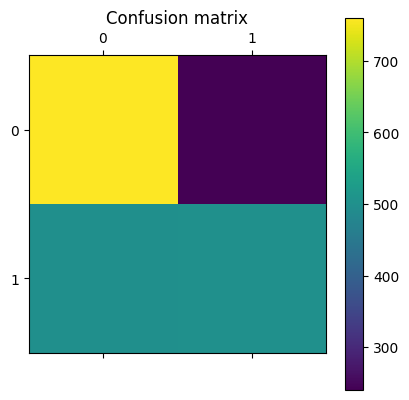

'\n#For classification of unknown files we can print the predictions\n#Print the Predictions \nprint ("Image =", image_paths)\nprint ("prediction ="  + str(predictions))\n\n#np.transpose to save data into columns, otherwise saving as rows\n\nnp.savetxt (\'mydata.csv\', np.transpose([image_paths, predictions]),fmt=\'%s\', delimiter=\',\', newline=\'\n\')\n'

In [41]:
def showconfusionmatrix(cm):
    pl.matshow(cm)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.show()


accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)

"""
#For classification of unknown files we can print the predictions
#Print the Predictions 
print ("Image =", image_paths)
print ("prediction ="  + str(predictions))

#np.transpose to save data into columns, otherwise saving as rows

np.savetxt ('mydata.csv', np.transpose([image_paths, predictions]),fmt='%s', delimiter=',', newline='\n')
"""

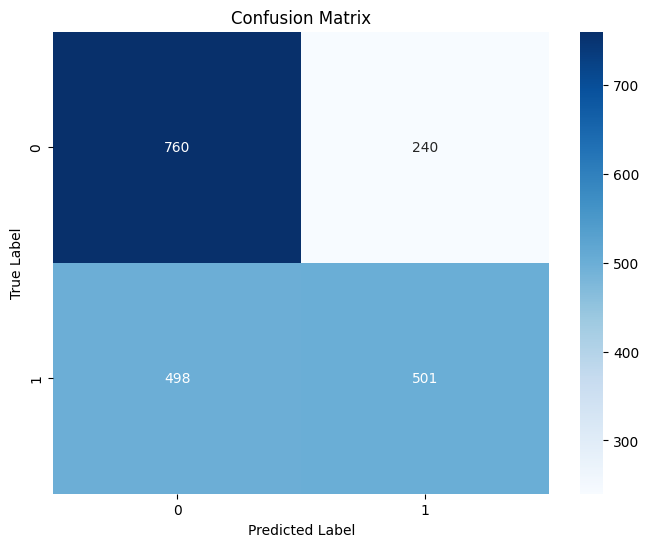

In [42]:
# Create a heatmap with numbers in each cell
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Class 0 - Correctly classified:


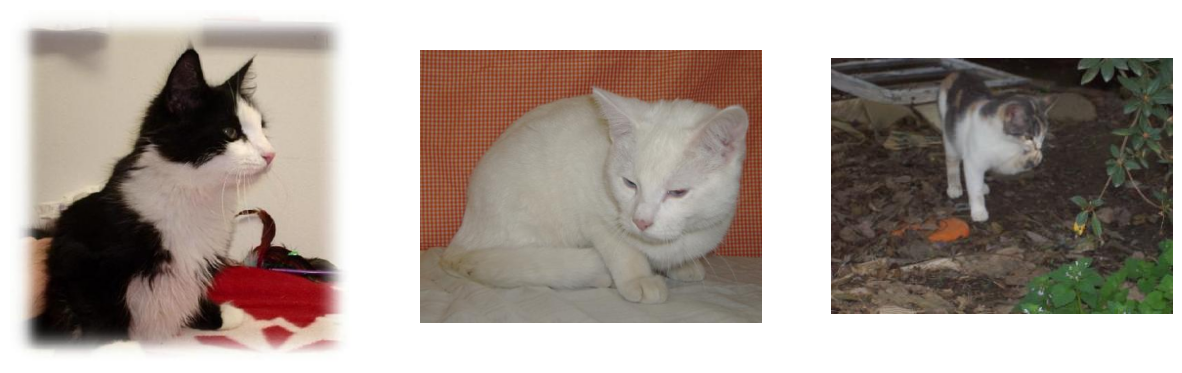

Class 0 - Incorrectly classified:


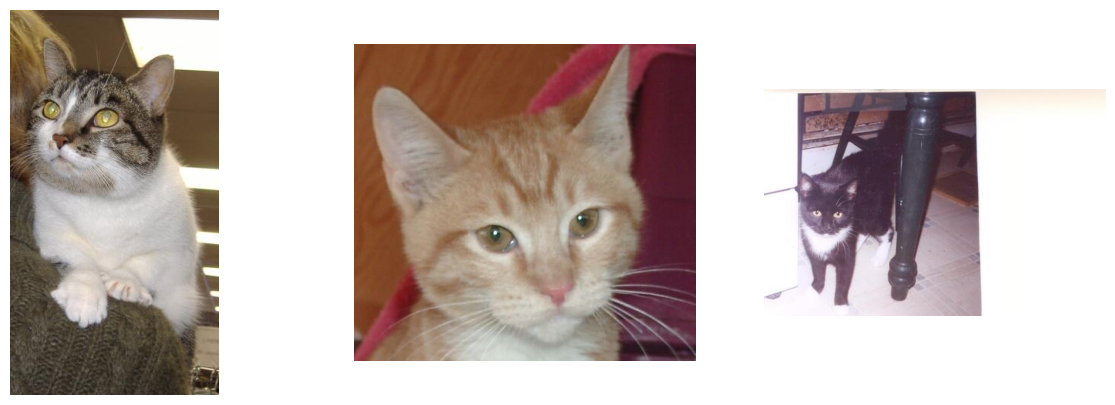

Class 1 - Correctly classified:


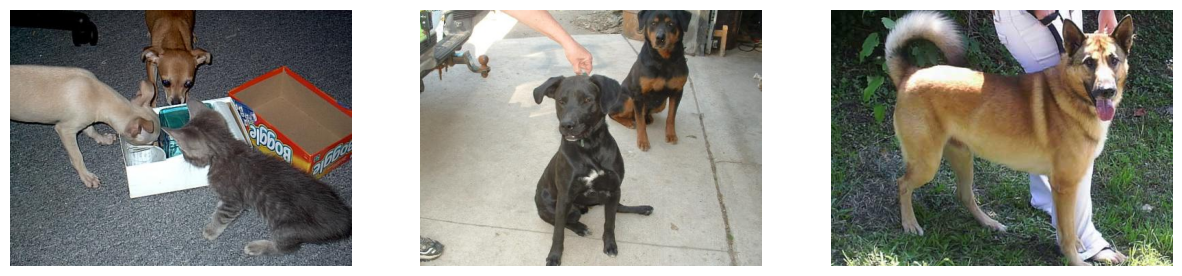

Class 1 - Incorrectly classified:


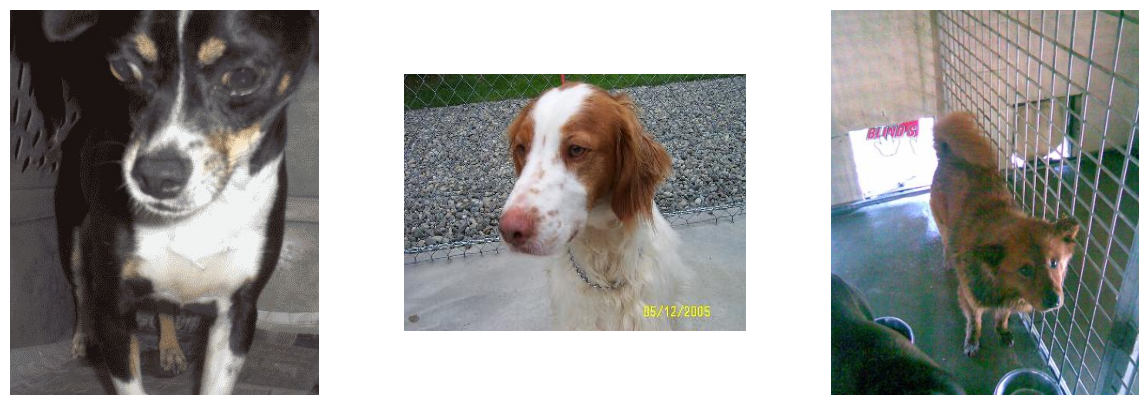

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

# Assuming true_class and predictions are defined earlier in your code
# Assuming image_paths contains the paths to the images

# Create a dictionary to store the indices of correct and incorrect classifications for each class
correct_indices = {0: [], 1: []}
incorrect_indices = {0: [], 1: []}

# Define a mapping from actual labels to numeric labels
label_mapping = {'Cat': 0, 'Dog': 1}

# Populate the correct and incorrect indices lists
for i in range(len(true_class)):
    true_label = label_mapping[true_class[i]]  # Map actual label to numeric label
    pred_label = label_mapping[predictions[i]]  # Map predicted label to numeric label
    if true_label == pred_label:
        correct_indices[true_label].append(i)
    else:
        incorrect_indices[true_label].append(i)

# Function to display images
def display_images_horizontally_color(image_paths, indices, num_samples=3):
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))  # Adjust figsize as needed
    selected_indices = np.random.choice(indices, num_samples, replace=False)
    for i, idx in enumerate(selected_indices):
        image_path = image_paths[idx]
        image = cv2.imread(image_path)  # Read image in color
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        axs[i].imshow(image)  # Display in color
        axs[i].axis('off')
    plt.show()

    
# Display successful and failed classifications for each class
for class_label in [0, 1]:
    print(f"Class {class_label} - Correctly classified:")
    display_images_horizontally_color(image_paths, correct_indices[class_label])
    print(f"Class {class_label} - Incorrectly classified:")
    display_images_horizontally_color(image_paths, incorrect_indices[class_label])
